In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('sal.csv')

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19262 entries, 0 to 19261
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 19232 non-null  object 
 1   Age                  19237 non-null  float64
 2   Years of Experience  19237 non-null  float64
 3   salary               19237 non-null  float64
dtypes: float64(3), object(1)
memory usage: 602.1+ KB


In [4]:
df.head()

,Name,Age,Years of Experience,salary
0,BRADDY,22.0,4.0,25000.0
1,BORST,21.0,3.0,25000.0
2,BIRDWELL,22.0,4.0,25000.0
3,BENT,21.0,3.0,25000.0
4,BAZAN,22.0,4.0,25000.0


In [5]:
df.shape

(19262, 4)

In [6]:
df.isnull().any()

Name                   True
Age                    True
Years of Experience    True
salary                 True
dtype: bool

In [7]:
df.isnull().sum()

Name                   30
Age                    25
Years of Experience    25
salary                 25
dtype: int64

In [8]:
df.dropna(inplace = True)
     

In [9]:
df.shape

(19232, 4)

In [10]:
df.isnull().any()

Name                   False
Age                    False
Years of Experience    False
salary                 False
dtype: bool

## Visualizations

<AxesSubplot:>

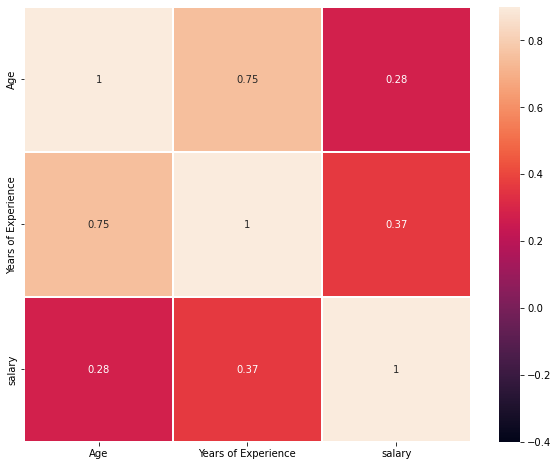

In [11]:
corrmatrix = df.corr()
plt.subplots(figsize =(10,8))
sns.heatmap(corrmatrix, vmin =-.4,vmax=0.9,annot =True ,linewidth =.2)

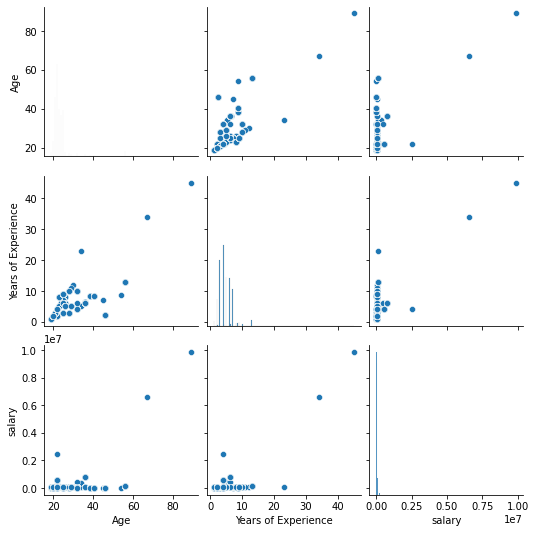

In [12]:
sns.pairplot(df)

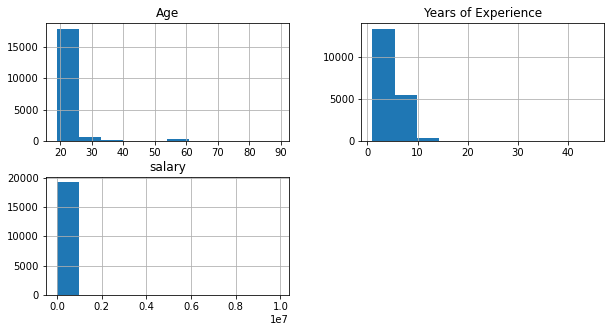

In [13]:
df.hist(figsize=(10,5))
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# For logistic regression, we need a binary target variable. Let's create a binary variable for 'Salary' where salaries above the median are 1 and below are 0.
median_salary = sal_df_cleaned['salary'].median()
sal_df_cleaned['High_Salary'] = (sal_df_cleaned['salary'] > median_salary).astype(int)

# Define the feature variables and the target variable.
X = sal_df_cleaned[['Age', 'Years of Experience']]
y = sal_df_cleaned['High_Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Calculate the classification report and confusion matrix
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1974
           1       0.98      0.91      0.95      1873

    accuracy                           0.95      3847
   macro avg       0.95      0.95      0.95      3847
weighted avg       0.95      0.95      0.95      3847

Confusion Matrix:
 [[1943   31]
 [ 167 1706]]


## MODEL TRAINING

### LINEAR REGRESSION

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# We will use the cleaned dataset without NaN values for linear regression
# Define the feature variables and the target variable
X_linear = sal_df_cleaned[['Age', 'Years of Experience']]
y_linear = sal_df_cleaned['salary']

# Split the data into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train_linear, y_train_linear)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_linear)

# Calculate the metrics
mse_linear = mean_squared_error(y_test_linear, y_pred_linear)
r2_linear = r2_score(y_test_linear, y_pred_linear)

# Output the metrics
print('Mean Squared Error for linear regression:', mse_linear)
print('R2 Score for linear regression:', r2_linear)

Mean Squared Error for linear regression: 3317636777.1463804
R2 Score for linear regression: 0.08194178416964759


### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(70,90)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

# Your dataset and training/testing data here...
# Assuming X_train, X_test, y_train, y_test are defined

acc_values = []
neighbors = np.arange(70, 90)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    print(f"Accuracy for k={k}: {acc}")

# Find the optimal value of k
optimal_k = neighbors[np.argmax(acc_values)]
print(f"Optimal value of k: {optimal_k}")

# Save the model with the optimal number of neighbors as a pickle file
optimal_classifier = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski')
optimal_classifier.fit(X_train, y_train)

with open('knn_model_optimal.pkl', 'wb') as file:
    pickle.dump(optimal_classifier, file)

Accuracy for k=70: 0.9685469196776709
Accuracy for k=71: 0.9685469196776709
Accuracy for k=72: 0.9685469196776709
Accuracy for k=73: 0.9685469196776709
Accuracy for k=74: 0.9685469196776709
Accuracy for k=75: 0.9685469196776709
Accuracy for k=76: 0.9685469196776709
Accuracy for k=77: 0.9688068624902522
Accuracy for k=78: 0.9688068624902522
Accuracy for k=79: 0.9688068624902522
Accuracy for k=80: 0.9688068624902522
Accuracy for k=81: 0.9688068624902522
Accuracy for k=82: 0.9688068624902522
Accuracy for k=83: 0.9688068624902522
Accuracy for k=84: 0.9688068624902522
Accuracy for k=85: 0.9688068624902522
Accuracy for k=86: 0.9688068624902522
Accuracy for k=87: 0.9688068624902522
Accuracy for k=88: 0.9688068624902522
Accuracy for k=89: 0.9688068624902522
Optimal value of k: 77


Text(0, 0.5, 'accuracy')

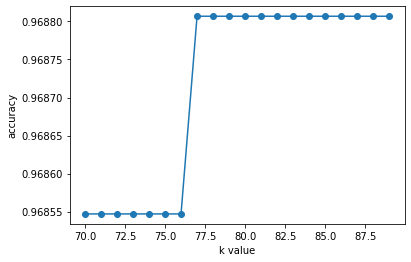

In [25]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [26]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723


### DECISION TREE CLASSIFIER

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [29]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723


### RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(X_train,y_train)
y_predict = Classifier.predict(X_test)

In [31]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723


### GRADIENT BOOSTING CLASSIFIER

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [33]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723


## HYPER PARAMETER TUNING

### KNN

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 10],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create the KNN model
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}


In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723


### LINEAR REGRESSION

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with a scaler and a Ridge regression model
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', Ridge())])

# Define the parameter grid
param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__alpha': 1}


In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.9685469196776709
precision: 1.0
recall: 0.9353977576081153
f1_score: 0.9666206896551723
